0


/tmp/ipykernel_3599766/357529647.py:23: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(2,1,1)


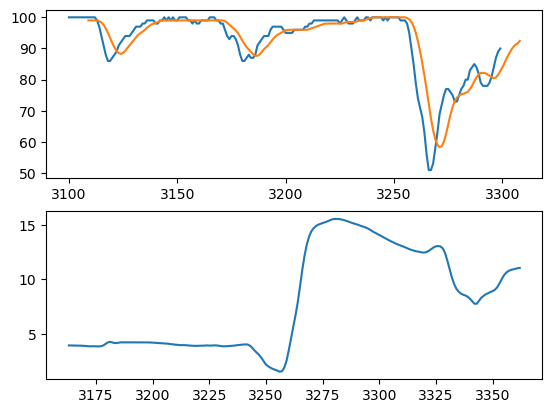

In [5]:
import matplotlib.pyplot as plt

# f = open('data/retrace.csv')
# tokens = [e.split(",") for e in f.readlines()]
# x = [int(e[0]) for e in tokens]
# y = [int(e[1]) for e in tokens]
# handle = plt.plot(x,y)

delta = 0
I = (3100 + delta,3300 + delta)

def get_trace_file(filename, I):
    f = open(filename, 'r')
    tokens = [e.split(",") for e in f.readlines()]
    x = [float(e[0]) for e in tokens][I[0]:I[1]]
    y = [float(e[1]) for e in tokens][I[0]:I[1]]
    return (x,y)


(x1,y1) = get_trace_file('data/trace.csv',I)
plt.subplot(2,1,1)
plt.plot(x1,y1)

(x2,y2) = get_trace_file('data/trace1.csv',I)
plt.subplot(2,1,1)
plt.plot(x2,y2)

(x3,y3) = get_trace_file('data/trace2.csv',I)
plt.subplot(2,1,2)
plt.plot(x3,[e**.5 for e in y3])

print(len([i for i,e in enumerate(y3) if e == 0]))

In [ ]:
f = open('trace2.csv')
vals = [int(e) for e in f.readline().split(',')[:-1]]
handle = plt.plot(vals)

f = open('trace4.csv')
vals = [int(e) for e in f.readline().split(',')[:-1]]
handle = plt.plot(vals)

In [ ]:
f = open('event1.csv')
events = [e.split(',') for e in f.readline().split(';')[:-1]]
cols = [['r','g','b'][int(e[0]) + 1] for e in events]
times = [int(e[1]) for e in events]
peaks = [int(e[3]) for e in events]
upper = [int(e[2]) + int(e[5]) for e in events]
lower = [int(e[2]) - int(e[5]) for e in events]
f = open('trace.csv')
vals = [int(e) for e in f.readline().split(',')[:-1]]
plt.plot(vals)
plt.scatter(times,peaks,color = cols)
plt.scatter(times,upper,marker='^', color = "y")
plt.scatter(times,lower,marker='_', color = "c")


In [ ]:
f = open('event2.csv')
events = [e.split(',') for e in f.readline().split(';')[:-1]]
cols = [['r','g','b'][int(e[0]) + 1] for e in events]
times = [int(e[1]) for e in events]
peaks = [int(e[3]) for e in events]
upper = [int(e[3]) + int(e[5]) for e in events]
lower = [int(e[3]) - int(e[5]) for e in events]
f = open('trace.csv')
vals = [int(e) for e in f.readline().split(',')[:-1]]
plt.plot(vals)
plt.scatter(times,peaks,color = cols)
plt.scatter(times,upper,marker='_', color = "y")
plt.scatter(times,lower,marker='', color = "c")


In [ ]:
tf = open('trace.csv')
f1 = open('event1.csv')
f2 = open('event2.csv')
f3 = open('event3.csv')
f4 = open('event4.csv')

def plot_graph(f,tf):
    events = [e.split(',') for e in f.readline().split(';')[:-1]]
    traces = [int(e) for e in tf.readline().split(',')[:-1]]
    plt.plot(traces)

    key = "-1"
    times = [int(e[1]) for e in events if e[0] == key]
    values = [int(e[3]) for e in events if e[0] == key]
    plt.scatter(times,values,marker = '_', color = 'b')

    key = "0"
    times = [int(e[1]) for e in events if e[0] == key]
    values = [int(e[3]) for e in events if e[0] == key]
    plt.scatter(times,values,marker = '.', color = 'g')

    key = "1"
    times = [int(e[1]) for e in events if e[0] == key]
    values = [int(e[3]) for e in events if e[0] == key]
    plt.scatter(times,values,marker = '^', color = 'r')

plot_graph(f1,tf)

In [ ]:
tf = open('trace.csv')
f1 = open('event1.csv')
f2 = open('event2.csv')
f3 = open('event3.csv')
f4 = open('event4.csv')

def plot_fd_graph_key(events,key, marker, col1,col2):
    events = [event[1:] for event in events if int(event[0]) == key]
    start = [e[:3] for e in events]
    end = [e[3:] for e in events]
    times = [int(e[0]) for e in start]
    values = [int(e[1]) for e in start]
    plt.scatter(times,values,marker = marker, color = col1)
    times = [int(e[0]) for e in end]
    values = [int(e[1]) for e in end]
    plt.scatter(times,values,marker = marker, color = col2)

def plot_fd_graph_type(events,type,col1,col2):
    events = [event[1:] for event in events if int(event[0]) == type]
    print(events)

    plot_fd_graph_key(events, -1, "_",col1,col2)
    plot_fd_graph_key(events, 0, ".",col1,col2)
    plot_fd_graph_key(events, 1, "^",col1,col2)

def plot_fd_graph(f,tf):
    events = [e.split(',') for e in f.readline().split(';')[:-1]]
    traces = [int(e) for e in tf.readline().split(',')[:-1]]
    plt.plot(traces)
    plot_fd_graph_type(events,0,'r','pink')
    plot_fd_graph_type(events,1,'b','lightblue')


plot_fd_graph(f4,tf)

In [ ]:
plot_graph(f3,tf)